In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df_sales

In [3]:
# loading csv files into dataframe
df_sales=pd.read_csv(r'C:\Users\Admin\Desktop\viji laptop\Project 2\Sales_df.csv')

In [4]:
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [5]:
#check data types
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [6]:
# check missing values
df_sales.isnull().mean()*100

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [7]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [12]:
df_sales['Order Date']

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
62879    2021-02-20
62880    2021-02-20
62881    2021-02-20
62882    2021-02-20
62883    2021-02-20
Name: Order Date, Length: 62884, dtype: object

In [8]:
# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

In [9]:
df_sales["Delivery Date"]

0                0
1        1/13/2016
2        1/13/2016
3        1/12/2016
4        1/12/2016
           ...    
62879            0
62880    2/24/2021
62881    2/23/2021
62882    2/23/2021
62883    2/23/2021
Name: Delivery Date, Length: 62884, dtype: object

In [10]:
#Column name change as per DB standard
df_sales.rename(columns={'Order Number': 'Order_Number', 'Line Item': 'Line_Item', 'Order Date':'Order_Date','Delivery Date':'Delivery_Date','Currency Code':'Currency_Code'}, inplace=True)

In [11]:
df_sales

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,0,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


In [12]:
df_sales.columns

Index(['Order_Number', 'Line_Item', 'Order_Date', 'Delivery_Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency_Code'],
      dtype='object')

In [13]:
df_sales.groupby('Currency_Code').count()[['CustomerKey']].reset_index()

,Currency_Code,CustomerKey
0,AUD,2941
1,CAD,5415
2,EUR,12621
3,GBP,8140
4,USD,33767


In [14]:
#Cleaned sales data
df_sales.to_csv("df_salescleaned.csv", index=False)

In [15]:
df_sales

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,0,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


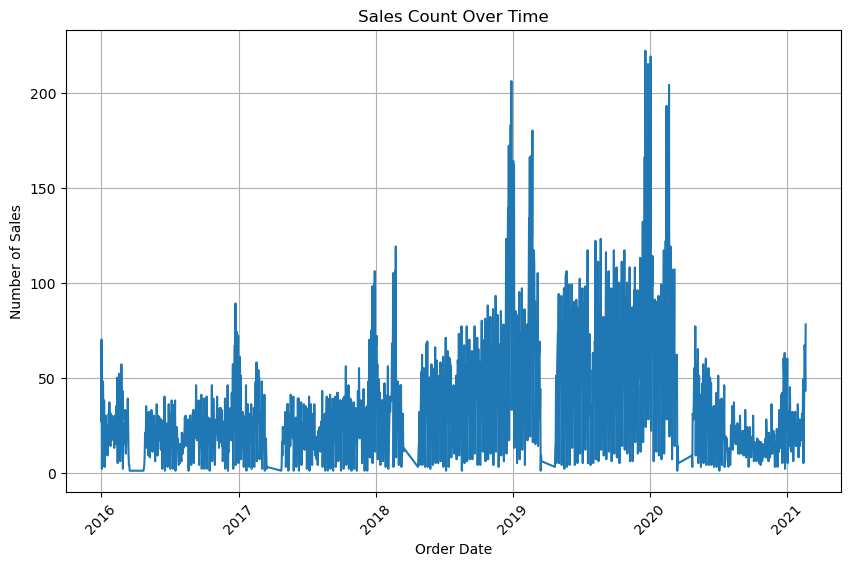

In [19]:
# Grouping by Order Date and counting the number of sales
sales_count_over_time = df_sales.groupby('Order_Date').agg(sales_count=('Order_Number', 'count')).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_count_over_time, x='Order_Date', y='sales_count')
plt.title('Sales Count Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
#df_stores

In [21]:
# loading csv files into dataframe
df_stores=pd.read_csv(r'C:\Users\Admin\Desktop\viji laptop\Project 2\Stores_df.csv')

In [22]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [23]:
#check data types
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [24]:
# check missing values
df_stores.isnull().mean()*100

StoreKey         0.000000
Country          0.000000
State            0.000000
Square Meters    1.492537
Open Date        0.000000
dtype: float64

In [25]:
df_stores[df_stores['Square Meters'].isnull()]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,1/1/2010


In [26]:
df_stores['Square Meters'] = df_stores['Square Meters'].fillna(0)


In [27]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [28]:
df_stores.isnull().sum()


StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [29]:
#Convert data type for date fields
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'])

In [30]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [31]:
# Column name change as per DB standard
df_stores.rename(columns={'Square Meters':'Square_Meters','Open Date':'Open_Date'},inplace=True)

In [32]:
df_stores

,StoreKey,Country,State,Square_Meters,Open_Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [33]:
#Cleaned stores data
df_stores.to_csv("df_storescleaned.csv", index=False)

In [34]:
df_stores

,StoreKey,Country,State,Square_Meters,Open_Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


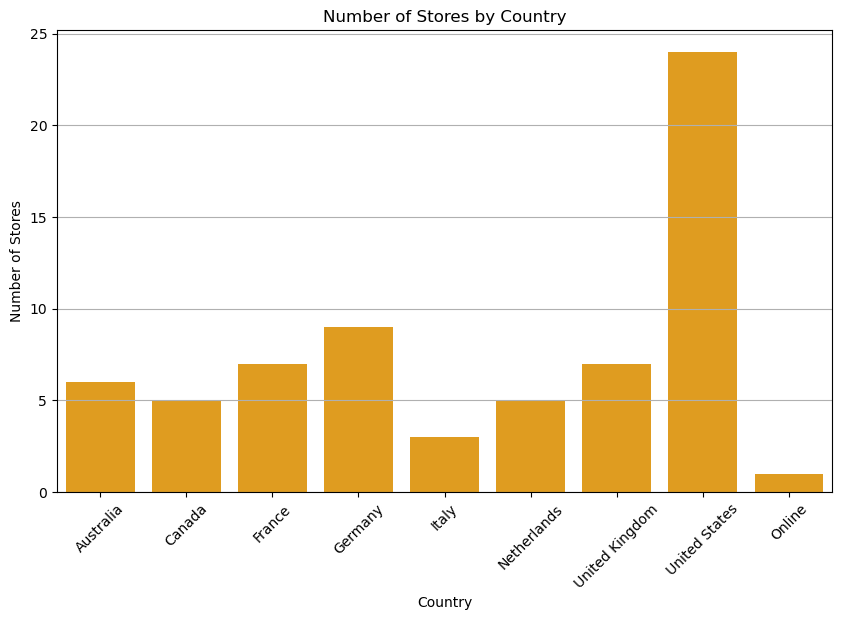

In [57]:
# Bar plot for number of stores across the country 
plt.figure(figsize=(10, 6))
sns.countplot(data=df_stores, x='Country', color='orange') 
plt.title('Number of Stores by Country')
plt.xlabel('Country')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# df_product

In [56]:
df_product=pd.read_csv(r'C:\Users\Admin\Desktop\viji laptop\Project 2\Products_df.csv')

In [54]:
df_product

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [58]:

df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [59]:
#Check for null value in product datafram
df_product.isnull().mean() * 100 

ProductKey        0.0
Product Name      0.0
Brand             0.0
Color             0.0
Unit Cost USD     0.0
Unit Price USD    0.0
SubcategoryKey    0.0
Subcategory       0.0
CategoryKey       0.0
Category          0.0
dtype: float64

In [60]:
# Column name change as per DB standard
df_product.rename(columns={'Product Name':'Product_Name','Unit Cost USD':'Unit_Cost_USD','Unit Price USD':'Unit_Price_USD'},inplace=True)


In [61]:
df_product

,ProductKey,Product_Name,Brand,Color,Unit_Cost_USD,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [62]:
#Cleaned product data
df_product.to_csv("df_productcleaned.csv", index=False)

In [63]:
df_product

,ProductKey,Product_Name,Brand,Color,Unit_Cost_USD,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


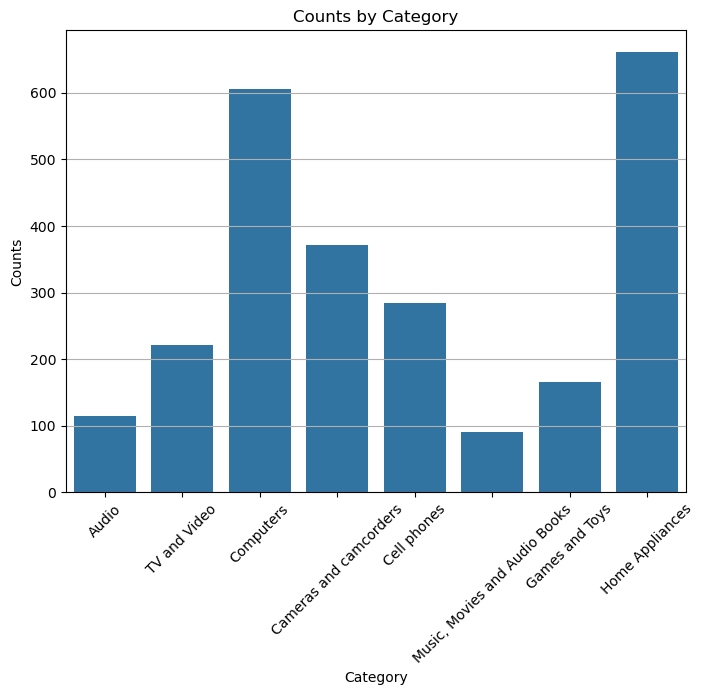

In [64]:
# Create the count plot for Comparison of Categories

plt.figure(figsize=(8, 6))
sns.countplot(x="Category", data=df_product)
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Counts by Category")
plt.xticks(rotation=45)  # Rotate x labels if there are many categories
plt.grid(axis='y') 
plt.show()

In [ ]:
#df_Customers

In [36]:
df_Customers=pd.read_csv(r'C:\Users\Admin\Desktop\viji laptop\Project 2\Customers_df.csv', encoding='latin1')

In [37]:
df_Customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [38]:
df_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [39]:
#checking null values
df_Customers.isnull().mean() * 100 

CustomerKey    0.000000
Gender         0.000000
Name           0.000000
City           0.000000
State Code     0.065505
State          0.000000
Zip Code       0.000000
Country        0.000000
Continent      0.000000
Birthday       0.000000
dtype: float64

In [ ]:
# less then 1% of record is null in customer table "state code" is missing

In [40]:
df_Customers[df_Customers['State Code'].isnull()]['CustomerKey'].count()

10

In [41]:
df_Customers[df_Customers['State Code'].isnull()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [42]:
#Convert data type for date fields
df_Customers['Birthday'] = pd.to_datetime(df_Customers['Birthday'])

In [43]:
df_Customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [44]:
#Column name change as per DB standard
df_Customers.rename(columns={'State Code':'State_Code','Zip Code':'Zip_Code'},inplace=True)

In [45]:
df_Customers

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [46]:
#Cleaned Customers data
df_Customers.to_csv("df_Customerscleaned.csv", index=False)

In [47]:
df_Customers

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


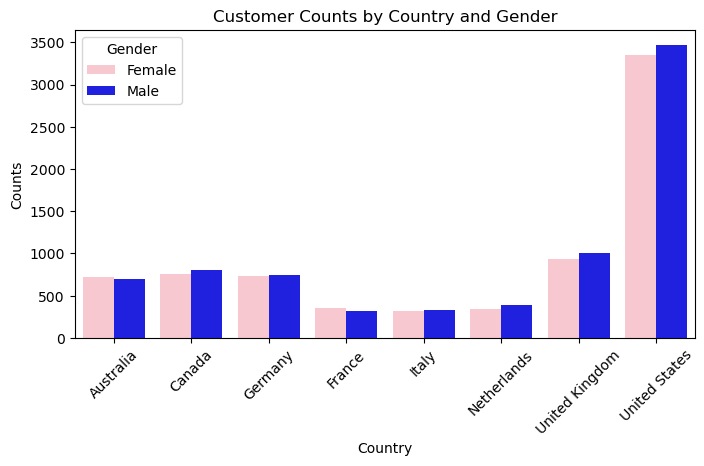

In [48]:
# visualizing Gender Breakdown of Customers Across Different Countries
# Define custom colors for Gender
custom_palette = {'Male': 'blue', 'Female': 'pink'}

plt.figure(figsize=(8,4))
sns.countplot(x='Country', data=df_Customers, hue='Gender', palette=custom_palette)
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Customer Counts by Country and Gender")
plt.xticks(rotation=45) # Rotate x labels for better readability
plt.legend(title='Gender') # Adding a legend for clarity on gender
plt.show()

In [49]:
# Calculate Age
df_Customers['Age'] = (pd.to_datetime('today') - df_Customers['Birthday']).dt.days // 365

In [50]:
df_Customers

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,87
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


In [51]:
#Cleaned Customers data
df_Customers.to_csv("df_Customerscleaned.csv", index=False)

In [52]:
df_Customers

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,87
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


In [53]:
#checking null values
df_Customers.isnull().mean() * 100 

CustomerKey    0.000000
Gender         0.000000
Name           0.000000
City           0.000000
State_Code     0.065505
State          0.000000
Zip_Code       0.000000
Country        0.000000
Continent      0.000000
Birthday       0.000000
Age            0.000000
dtype: float64

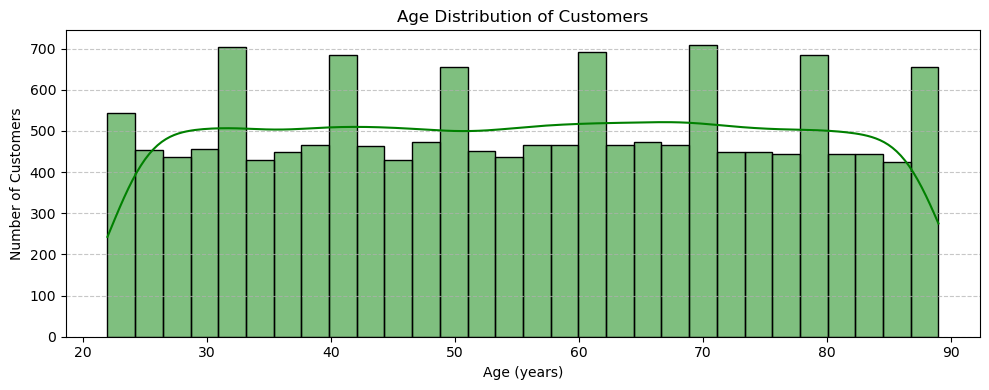

In [55]:
#histogram showing the age distribution of customers
plt.figure(figsize=(10, 4))
sns.histplot(df_Customers['Age'], bins=30, kde=True, color='Green', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age (years)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
#Exchange_Rates_df

In [81]:
df_Exchange_Rates=pd.read_csv(r'C:\Users\Admin\Desktop\viji laptop\Project 2\Exchange_Rates_df.csv', encoding='latin1')

In [82]:
df_Exchange_Rates

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [84]:
#Check for null value in Exchange dataframe
df_Exchange_Rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [85]:
df_Exchange_Rates.isnull().mean() * 100 

Date        0.0
Currency    0.0
Exchange    0.0
dtype: float64

In [86]:
#Convert data type for date fields
df_Exchange_Rates['Date'] = pd.to_datetime(df_Exchange_Rates['Date'])

In [87]:
df_Exchange_Rates

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [90]:
#Cleaned Customers data
df_Exchange_Rates.to_csv("df_Exchange_Rates.csv", index=False)

In [91]:
df_Exchange_Rates

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [ ]:
#Merging of datasets

In [37]:
import pandas as pd

In [38]:
# Load all the cleaned datasets
customers = pd.read_csv("df_Customerscleaned.csv")
sales = pd.read_csv("df_salescleaned.csv")
stores = pd.read_csv("df_storescleaned.csv")
products = pd.read_csv("df_productcleaned.csv")
exchange_rates=pd.read_csv("df_Exchange_Rates.csv")


In [39]:
customers

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [40]:
# Merging dataframes
#merge the sales DataFrame with the customers DataFrame based on the CustomerKey.
merged_data = pd.merge(sales, customers, on="CustomerKey",how="inner")
#the previously merged DataFrame (merged_data) is merged with the products DataFrame based on ProductKey.
merged_data = pd.merge(merged_data, products, on="ProductKey", how="inner")
# merge the current merged_data with the stores DataFrame based on multiple keys: StoreKey, Country, and State.
merged_data = pd.merge(merged_data, stores,on=['StoreKey','Country','State'],how='inner')

In [41]:
merged_data

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,...,Brand,Color,Unit_Cost_USD,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category,Square_Meters,Open_Date
0,366005,1,2016-01-01,0,844003,33,421,4,EUR,Male,...,Adventure Works,Silver,$215.68,$469.00,303,Desktops,3,Computers,1540.0,2015-12-09
1,367006,1,2016-01-02,0,693285,18,2445,3,EUR,Female,...,Litware,Green,$2.54,$4.99,808,Fans,8,Home Appliances,310.0,2012-08-08
2,367010,1,2016-01-02,0,1322959,66,917,1,USD,Male,...,Southridge Video,White,$59.31,$179.00,308,Computers Accessories,3,Computers,840.0,2014-01-01
3,367010,2,2016-01-02,0,1322959,66,39,1,USD,Male,...,Contoso,Green,$99.14,$299.23,101,MP4&MP3,1,Audio,840.0,2014-01-01
4,369007,1,2016-01-04,0,571622,20,2510,3,EUR,Male,...,Contoso,White,$2.07,$4.06,505,Cell phones Accessories,5,Cell phones,1715.0,2012-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,0,1453427,50,423,1,USD,Male,...,Adventure Works,Black,$275.46,$599.00,303,Desktops,3,Computers,2000.0,2008-03-06
6177,2243014,2,2021-02-20,0,1453427,50,1617,1,USD,Male,...,Contoso,Silver,$26.67,$57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2000.0,2008-03-06
6178,2243014,3,2021-02-20,0,1453427,50,2506,4,USD,Male,...,Contoso,Pink,$2.42,$4.74,505,Cell phones Accessories,5,Cell phones,2000.0,2008-03-06
6179,2243021,1,2021-02-20,0,1783631,55,1147,4,USD,Male,...,Fabrikam,Black,$301.21,$655.00,405,Camcorders,4,Cameras and camcorders,2000.0,2009-12-15


In [42]:
#merge the exchange rate information into your previously merged dataset (merged_data)
merged_data = pd.merge(merged_data, exchange_rates,left_on=['Order_Date','Currency_Code'],right_on=['Date','Currency'], how="inner")

In [43]:
merged_data

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,...,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category,Square_Meters,Open_Date,Date,Currency,Exchange
0,366005,1,2016-01-01,0,844003,33,421,4,EUR,Male,...,$469.00,303,Desktops,3,Computers,1540.0,2015-12-09,2016-01-01,EUR,0.9185
1,367006,1,2016-01-02,0,693285,18,2445,3,EUR,Female,...,$4.99,808,Fans,8,Home Appliances,310.0,2012-08-08,2016-01-02,EUR,0.9185
2,367010,1,2016-01-02,0,1322959,66,917,1,USD,Male,...,$179.00,308,Computers Accessories,3,Computers,840.0,2014-01-01,2016-01-02,USD,1.0000
3,367010,2,2016-01-02,0,1322959,66,39,1,USD,Male,...,$299.23,101,MP4&MP3,1,Audio,840.0,2014-01-01,2016-01-02,USD,1.0000
4,369007,1,2016-01-04,0,571622,20,2510,3,EUR,Male,...,$4.06,505,Cell phones Accessories,5,Cell phones,1715.0,2012-12-15,2016-01-04,EUR,0.9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,0,1453427,50,423,1,USD,Male,...,$599.00,303,Desktops,3,Computers,2000.0,2008-03-06,2021-02-20,USD,1.0000
6177,2243014,2,2021-02-20,0,1453427,50,1617,1,USD,Male,...,$57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2000.0,2008-03-06,2021-02-20,USD,1.0000
6178,2243014,3,2021-02-20,0,1453427,50,2506,4,USD,Male,...,$4.74,505,Cell phones Accessories,5,Cell phones,2000.0,2008-03-06,2021-02-20,USD,1.0000
6179,2243021,1,2021-02-20,0,1783631,55,1147,4,USD,Male,...,$655.00,405,Camcorders,4,Cameras and camcorders,2000.0,2009-12-15,2021-02-20,USD,1.0000


In [44]:
#checking for the missing values
merged_data.isnull().mean()*100

Order_Number      0.0
Line_Item         0.0
Order_Date        0.0
Delivery_Date     0.0
CustomerKey       0.0
StoreKey          0.0
ProductKey        0.0
Quantity          0.0
Currency_Code     0.0
Gender            0.0
Name              0.0
City              0.0
State_Code        0.0
State             0.0
Zip_Code          0.0
Country           0.0
Continent         0.0
Birthday          0.0
Product_Name      0.0
Brand             0.0
Color             0.0
Unit_Cost_USD     0.0
Unit_Price_USD    0.0
SubcategoryKey    0.0
Subcategory       0.0
CategoryKey       0.0
Category          0.0
Square_Meters     0.0
Open_Date         0.0
Date              0.0
Currency          0.0
Exchange          0.0
dtype: float64

In [45]:
#checking duplicates
duplicates=merged_data.duplicated().sum()
print(f"number of duplicates found:{duplicates}")

number of duplicates found:0


In [48]:
# save the merged datas into a csv file
merged_data.to_csv("Merged Data.csv", index=False)

In [50]:
# Connecting to the MySQL database, creating a database, setting up tables, and inserting values into those tables using SQL insert queries.
import pymysql

In [51]:
# creating databse called global_Electronics
import pymysql
mydb = pymysql.connect(
       host='127.0.0.1',
       user='root',
       password='2510vihaan',
    
)
mycursor=mydb.cursor()
mycursor.execute("CREATE DATABASE Global_Electronics")



mydb.close()




In [54]:
#creating a table for merged_datasets
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    database='Global_Electronics'
)

# Load the CSV data into a DataFrame
merged_data = pd.read_csv("Merged Data.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip( merged_data.columns, merged_data.dtypes)
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "global_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(merged_data.columns)}) VALUES ({', '.join(['%s'] * len(merged_data.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(merged_data)):
        cursor.execute(insert_query, tuple(merged_data.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()

In [1]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
   host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    database='Global_Electronics'
)

# Load the CSV data into a DataFrame
sales = pd.read_csv("df_salescleaned.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(sales.columns, sales.dtypes)  # Updated to use 'sales'
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "sales_table"  # Ensure the table name reflects the data it will hold
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(sales.columns)}) VALUES ({', '.join(['%s'] * len(sales.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(sales)):
        cursor.execute(insert_query, tuple(sales.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()

In [2]:
#creating a table from cleaned stores dataset
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
     host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    database='Global_Electronics'
    
)

# Load the CSV data into a DataFrame
stores = pd.read_csv("df_storescleaned.csv")

# Create a string for the table columns, excluding StoreKey from the column definitions
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(stores.columns, stores.dtypes)  # Use 'stores' DataFrame
    if i != 'StoreKey'  # Exclude StoreKey from column definitions
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with StoreKey as the primary key
table_name = "stores_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    StoreKey INT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query
insert_query = f"INSERT INTO {table_name} ({', '.join(stores.columns)}) VALUES ({', '.join(['%s'] * len(stores.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(stores)):
        cursor.execute(insert_query, tuple(stores.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()

In [2]:
#creating table for cleaned products dataset
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
     host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
products = pd.read_csv(r"df_productcleaned.csv")

# Create a string for the table columns, excluding ProductKey from the column definitions
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(products.columns, products.dtypes)
    if i != 'ProductKey'  # Exclude ProductKey from column definitions
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with ProductKey as the primary key
table_name = "products_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    ProductKey INT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query
insert_query = f"INSERT INTO {table_name} ({', '.join(products.columns)}) VALUES ({', '.join(['%s'] * len(products.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(products)):
        cursor.execute(insert_query, tuple(products.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()

In [7]:
#creating a table for cleaned customer dataset
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    
    database="Global_Electronics"
    
)

# Load the CSV data into a DataFrame
customers = pd.read_csv(r"df_Customerscleaned.csv")
customers = customers.where(pd.notna(customers), None)

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(customers.columns, customers.dtypes)
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "customers_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(customers.columns)}) VALUES ({', '.join(['%s'] * len(customers.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(customers)):
        cursor.execute(insert_query, tuple(customers.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()

In [6]:
#creating a table from cleaned Exchange_rate dataset
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='2510vihaan',
    database="Global_Electronics"
  
)

# Load the CSV data into a DataFrame
exchange = pd.read_csv("df_Exchange_Rates.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(exchange.columns, exchange.dtypes)  # Use 'exchange' DataFrame
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "exchange_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(exchange.columns)}) VALUES ({', '.join(['%s'] * len(exchange.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(exchange)):
        cursor.execute(insert_query, tuple(exchange.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()